In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from tensorflow import keras
from tensorflow.keras.layers import *
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow import feature_column

In [16]:
img_height = 200
img_width = 200
batch_size = 3

In [17]:
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    # "processed_data/train",
   'data/faces/train/',

    labels="inferred",
    label_mode="int",  # categorical, binary
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="training",
)

classname = ds_train.class_names
print(classname)

ds_validation = tf.keras.preprocessing.image_dataset_from_directory(
    'data/faces/train/',

    labels="inferred",
    label_mode="int",  # categorical, binary
    batch_size=batch_size,
    image_size=(img_height, img_width),  # reshape if not in this size
    shuffle=True,
    seed=123,
    validation_split=0.2,
    subset="validation",
)


def augment(x, y):
    image = tf.image.random_brightness(x, max_delta=0.05)
    return image, y

ds_train = ds_train.map(augment).repeat()

Found 107 files belonging to 3 classes.
Using 86 files for training.
['1', '2', '3']
Found 107 files belonging to 3 classes.
Using 21 files for validation.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape=(200,200,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(521,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(3)
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 99, 99, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 23, 23, 64)      

In [19]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = 'adamax',
    metrics = ['accuracy']
)

Epoch 1/1000
5/5 [==============================] - 4s 417ms/step - loss: 268.6974 - accuracy: 0.4000 - val_loss: 13.9447 - val_accuracy: 0.5714
Epoch 2/1000
5/5 [==============================] - 2s 335ms/step - loss: 123.4267 - accuracy: 0.4000 - val_loss: 47.4734 - val_accuracy: 0.5714
Epoch 3/1000
5/5 [==============================] - 2s 313ms/step - loss: 64.8426 - accuracy: 0.4000 - val_loss: 1.0502 - val_accuracy: 0.8095
Epoch 4/1000
5/5 [==============================] - 2s 314ms/step - loss: 9.0577 - accuracy: 0.4000 - val_loss: 1.9363 - val_accuracy: 0.7143
Epoch 5/1000
5/5 [==============================] - 1s 308ms/step - loss: 12.4483 - accuracy: 0.1333 - val_loss: 0.7862 - val_accuracy: 0.6667
Epoch 6/1000
5/5 [==============================] - 1s 301ms/step - loss: 2.8845 - accuracy: 0.2857 - val_loss: 2.0849 - val_accuracy: 0.4762
Epoch 7/1000
5/5 [==============================] - 1s 293ms/step - loss: 0.9089 - accuracy: 0.6667 - val_loss: 0.4447 - val_accuracy: 0.761

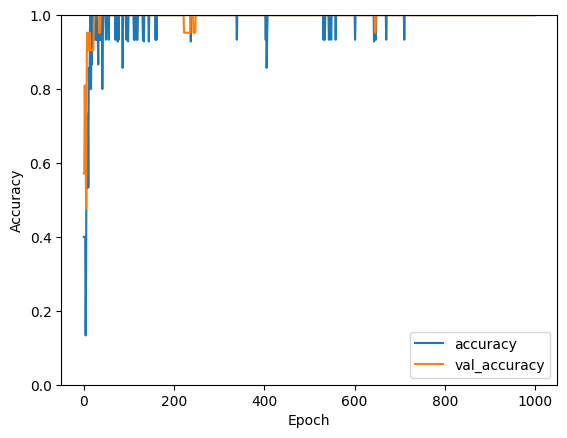

7/7 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000


[0.0, 1.0]

In [20]:
model_fit = model.fit(
    ds_train,
    steps_per_epoch=5,
    epochs=1000,
    validation_data=ds_validation,
)
plt.plot(model_fit.history['accuracy'], label='accuracy')
plt.plot(model_fit.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

model.evaluate(ds_validation)

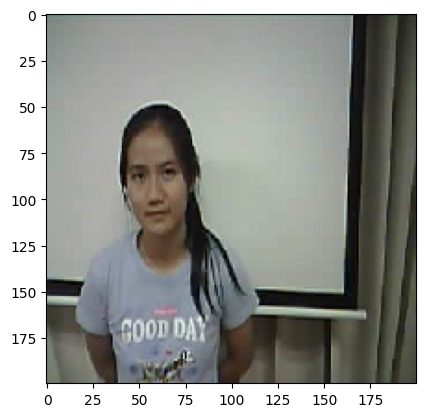

1/1 [==============================] - 0s 91ms/step
[[ 17.706219   -5.0911508 -23.53606  ]]
['1', '2', '3']
1


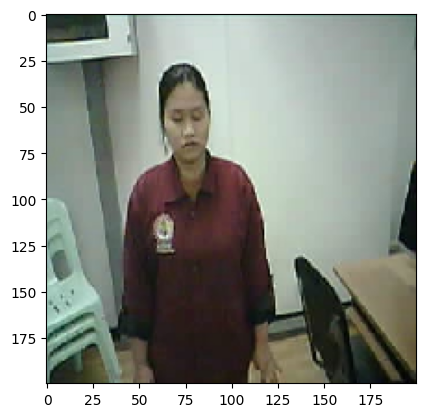

1/1 [==============================] - 0s 38ms/step
[[-15.776044  22.800638 -28.59102 ]]
['1', '2', '3']
2


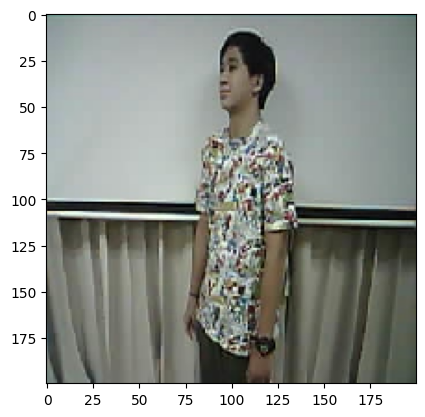

1/1 [==============================] - 0s 33ms/step
[[-8.569725 -5.779709  6.147896]]
['1', '2', '3']
3
[array([[ 17.706219 ,  -5.0911508, -23.53606  ]], dtype=float32), array([[-15.776044,  22.800638, -28.59102 ]], dtype=float32), array([[-8.569725, -5.779709,  6.147896]], dtype=float32)]


In [21]:
# from PIL import Image

dir_path = 'data/faces/test/'
zz = []


for i in os.listdir(dir_path):
    img = image.load_img(dir_path+i,target_size=(200,200,3))
    plt.imshow(img)
    # img1 = img.convert('L')
    # plt.imshow(img1)
    plt.show()

    x = image.img_to_array(img)
    # x = image.img_to_array(img1)

    x = np.expand_dims(x,axis=0)

    images = np.vstack([x])
    val = model.predict(images)

    print(val)
    print(classname)

    zz.append(val)

    count = 0
    maxval = val.item(count)
    countans = count
    for i in range(val.size):
        # print(val.size)
        if val.item(count) > maxval:
            maxval = val.item(count)
            countans = count
            # print("max:"+str(maxval))
            # print(str(countans) +"\n" )
        count+=1
    print(classname[countans])

print(zz)

In [22]:
model.save('my_model.h5')